In [14]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [15]:
climate_data = xr.open_dataset("C:/Users/macie/OneDrive/Desktop/Project_A02/Project_data/f100___________20171202_0000_ECHAM5.nc")

In [16]:
climate_data

<xarray.Dataset>
Dimensions:      (time: 30, lon: 128, lat: 64, lev: 31, ilev: 32, tbnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon          (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat          (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
  * lev          (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * ilev         (ilev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0 32.0
Dimensions without coordinates: tbnds
Data variables: (12/85)
    YYYYMMDD     (time) float64 ...
    dt           (time) float64 ...
    nstep        (time) float64 ...
    hyam         (lev) float32 ...
    hybm         (lev) float32 ...
    hyai         (ilev) float32 ...
    ...           ...
    sigmadot     (time, ilev, lat, lon) float32 ...
    tke          (time, lev, lat, lon) float32 ...
    ocu          (time, lat, lon) float32 ...
    ocv          (time, lat, lon) float32 ...
    aps          (time, lat, lon) float32 ...
    time_bnds    (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             ECHAM5
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_ECHAM5.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

[345.9375 348.75   351.5625 354.375  357.1875   0.       2.8125   5.625
   8.4375  11.25    14.0625  16.875   19.6875  22.5     25.3125  28.125
  30.9375  33.75    36.5625  39.375   42.1875  45.      47.8125  50.625
  53.4375  56.25    59.0625  61.875 ]
[20.929575 23.720175 26.510769 29.30136  32.091946 34.882523 37.673088
 40.46365  43.254196 46.044727 48.83524  51.625732 54.4162   57.20663
 59.99702  62.787354 65.57761  68.36776  71.15775 ]


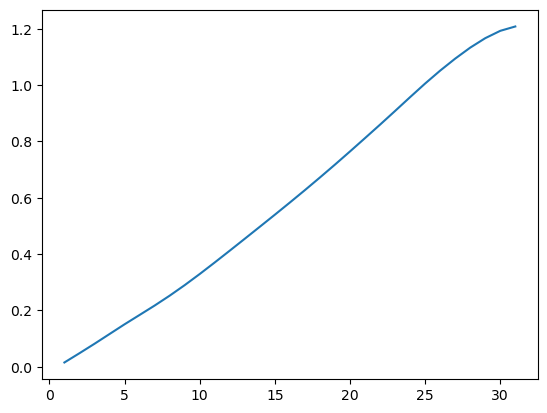

In [20]:
temperature = climate_data.variables['tm1']
density = climate_data.variables['rho_air_dry']
time = climate_data.coords['time']
lon = climate_data.coords['lon']
lat = climate_data.coords['lat']
lev = climate_data.coords['lev']
# print(temperature.data[0, 0, 0, 0])
# print(density.data[0, 30, 0, 0])
# print(time.data[0])
# print(lon.data[0])
# print(lat.data[0])
# print(lev.data[30])
#print(density[0, 15, 32])
#print(lat[32])
#print(temperature[0, 30, 32])
lon1 = lon.data[0:23]
lon2 = lon.data[-5:-1]
lon3 = lon.data[-1]
intermiediate_lon = np.append(lon2, lon3)
lon_values = np.append(intermiediate_lon, lon1)
print(lon_values)
lat_values = lat.data[6:25]
lat_values = np.flip(lat_values)
print(lat_values)
density_1 = np.mean(density.data, axis=2)
density_1 = np.mean(density_1, axis=2)
density_test = []
for i in range(0, len(lev)):
    density_test.append(density_1[0,i,])
plt.plot(lev.data, density_test)
plt.show()

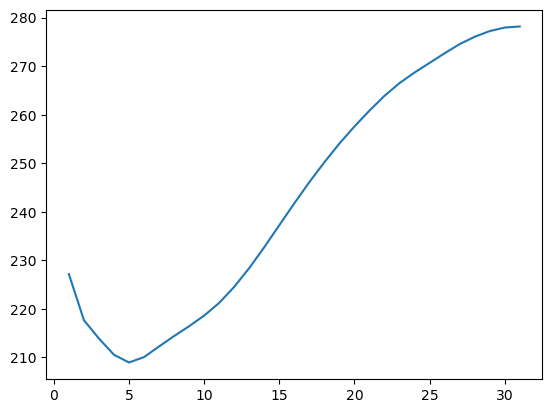

In [23]:
temp_1 = np.mean(temperature.data, axis=2)
temp_1 = np.mean(temp_1, axis=2)
temp_test = []
for i in range(0, len(lev)):
    temp_test.append(temp_1[0,i])
plt.plot(lev.data, temp_test)
plt.show()

In [6]:
temperature_values = np.zeros((len(lev), len(lat), len(lon)))

for k in range(len(lev)):
    for j in range(len(lat)):
        for o in range(len(lon)):
            sum = 0
            for i in range(len(time)):
                sum = sum + temperature.data[i, k, j, o]
            temperature_values[k, j, o] = sum/len(time)
temperature_values

array([[[206.14948832, 206.0750946 , 206.00504761, ..., 206.39639231,
         206.31037547, 206.22799123],
        [203.75694529, 203.57307943, 203.39846191, ..., 204.35740255,
         204.14978587, 203.94940287],
        [201.50796712, 201.21713155, 200.94042155, ..., 202.45441284,
         202.12773641, 201.81187236],
        ...,
        [250.53499451, 250.50659129, 250.4795222 , ..., 250.62815043,
         250.59577179, 250.56472117],
        [251.01407674, 250.99368795, 250.97413534, ..., 251.08005066,
         251.05728099, 251.03528239],
        [251.33014221, 251.32021739, 251.31056163, ..., 251.36135763,
         251.35073547, 251.34032135]],

       [[206.72593791, 206.65140635, 206.58090312, ..., 206.97152456,
         206.88622284, 206.80428365],
        [204.63645782, 204.46006317, 204.29250997, ..., 205.21337687,
         205.01366577, 204.82117157],
        [202.71546783, 202.44644572, 202.1909551 , ..., 203.59657694,
         203.2913147 , 202.99733683],
        ...,


In [151]:
density_values = np.zeros((len(lev), len(lat), len(lon)))

for k in range(len(lev)):
    for j in range(len(lat)):
        for o in range(len(lon)):
            sum = 0
            for i in range(len(time)):
                sum = sum + density.data[i, k, j, o]
            density_values[k, j, o] = sum/len(time)
density_values

array([[[0.0169141 , 0.01692016, 0.01692586, ..., 0.01689393,
         0.01690096, 0.01690769],
        [0.01711659, 0.01713192, 0.01714648, ..., 0.0170665 ,
         0.01708382, 0.01710053],
        [0.01731132, 0.01733607, 0.01735962, ..., 0.01723081,
         0.01725858, 0.01728545],
        ...,
        [0.01390795, 0.01390954, 0.01391105, ..., 0.01390272,
         0.01390454, 0.01390628],
        [0.01388101, 0.01388213, 0.01388321, ..., 0.01387736,
         0.01387863, 0.01387984],
        [0.01386329, 0.01386383, 0.01386436, ..., 0.01386157,
         0.01386216, 0.01386273]],

       [[0.05059741, 0.05061552, 0.05063263, ..., 0.05053768,
         0.05055844, 0.05057836],
        [0.05112163, 0.05116534, 0.05120685, ..., 0.05097877,
         0.0510282 , 0.05107587],
        [0.05161424, 0.05168199, 0.05174636, ..., 0.05139275,
         0.05146941, 0.05154332],
        ...,
        [0.04383184, 0.04383911, 0.04384584, ..., 0.04380697,
         0.04381574, 0.04382404],
        [0.0

In [10]:
test = np.mean(temperature, axis=0)
rem = np.arange(0, 6)
rem2 = np.arange(25, len(lat))
rem3 = np.append(rem, rem2) 
test = np.delete(test, rem3 , axis = 1)


<xarray.Variable (lev: 31, lat: 19, lon: 128)>
array([[[195.90453, 195.42397, 194.97139, ..., 197.50636, 196.94693,
         196.41258],
        [195.4426 , 194.9835 , 194.55785, ..., 197.0075 , 196.45735,
         195.93468],
        [195.36874, 194.9622 , 194.59335, ..., 196.81049, 196.29617,
         195.81416],
        ...,
        [225.23738, 225.3412 , 225.37296, ..., 224.7326 , 224.89511,
         225.0729 ],
        [226.75493, 226.76808, 226.72299, ..., 226.33163, 226.50461,
         226.65935],
        [227.87978, 227.84615, 227.76414, ..., 227.60558, 227.73378,
         227.83638]],

       [[198.09134, 197.6627 , 197.2591 , ..., 199.52466, 199.02222,
         198.54446],
        [197.69606, 197.29796, 196.92357, ..., 199.05223, 198.57127,
         198.11974],
        [197.55052, 197.20311, 196.87988, ..., 198.77048, 198.33195,
         197.92577],
...
        [285.7562 , 285.00775, 283.0602 , ..., 286.38226, 285.0976 ,
         285.06668],
        [285.9203 , 285.18893, 283.42926, ..., 285.88913, 285.8146 ,
         285.74942],
        [288.57962, 289.2883 , 288.25772, ..., 286.14774, 287.12357,
         287.6901 ]],

       [[272.6981 , 273.58548, 274.30078, ..., 270.21805, 270.94177,
         271.77884],
        [276.16446, 276.74924, 276.61832, ..., 271.999  , 273.47034,
         274.97903],
        [278.42517, 277.72653, 276.13412, ..., 274.74423, 276.6096 ,
         278.00208],
        ...,
        [284.7834 , 283.70624, 281.77103, ..., 284.6412 , 283.2719 ,
         283.89844],
        [285.42593, 283.8905 , 281.99857, ..., 284.67892, 285.08322,
         285.56604],
        [287.3957 , 287.3756 , 286.1701 , ..., 285.28253, 286.36667,
         286.93646]]], dtype=float32)